In [24]:
#Importing required dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#load the stored processed dataset
data_dict = pickle.load(open('/Users/MkupeteJaah/Desktop/DataSets/data30.pickle', 'rb'))

#separate hand landmarks and label
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, 
                                                    stratify=labels,random_state=42)

# Create a RandomForestClassifier
model = RandomForestClassifier()

# Train the classifier
model.fit(x_train, y_train)

# Make predictions on the test set
y_predict = model.predict(x_test)

# Evaluate the accuracy
score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))


100.0% of samples were classified correctly !


In [31]:
# Calculate various classification metrics
accuracy = accuracy_score(y_predict, y_test)
precision = precision_score(y_predict, y_test, average='weighted')
recall = recall_score(y_predict, y_test, average='weighted')
f1 = f1_score(y_predict, y_test, average='weighted')
conf_matrix = confusion_matrix(y_predict, y_test)

In [32]:
# Display the metrics
print(f"Accuracy: {accuracy *100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


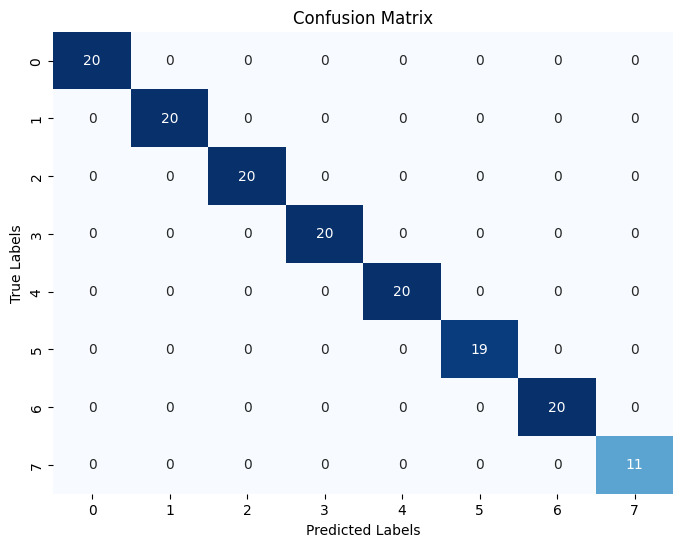

In [33]:
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
f = open('/Users/MkupeteJaah/Desktop/ProjectData/Model/model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()